In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

url="/content/Housing.csv"
df = pd.read_csv(url)

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [120]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Функція гіпотези лінійної регресії у векторному вигляді
$h_{\vec{w}}(\vec{x}) = \vec{w}^T \vec{x}$ , де $\overrightarrow{\omega}$ - вектор параметрів,  $\overrightarrow{x}$ - вектор ознак

Функція для обчислення функції втрат у векторному вигляді:
$J(\vec{w}) = \frac{1}{2m} \sum_{i=1}^{m} (h_{\vec{w}}(\vec{x}^{(i)}) - y^{(i)})^2$

Один крок градієнтного спуску
$\vec{w} := \vec{w} - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_{\vec{w}}(\vec{x}^{(i)}) - y^{(i)}) \vec{x}^{(i)}$

Аналітичне рішення
$\vec{w} = (X^T X)^{-1} X^T \vec{y}$


In [121]:
df['intercept'] = 1
X = df[['area', 'bathrooms', 'bedrooms', 'intercept']].values
y = df['price'].values

# Гіпотеза лінійної регресії у векторному вигляді
def hypothesis(theta, X):
    return np.dot(X, theta)

# Функція втрат у векторному вигляді (Mean Squared Error)
def compute_cost(theta, X, y):
    m = len(y)
    error = hypothesis(theta, X) - y
    cost = np.sum(error**2) / (2 * m)
    return cost

# Один крок градієнтного спуску
def gradient_descent_step(theta, X, y, learning_rate, verbose=False):
    m = len(y)
    error = hypothesis(theta, X) - y
    gradient = np.dot(X.T, error) / m
    theta -= learning_rate * gradient

    if verbose:
        cost = compute_cost(theta, X, y)
        print(f'Cost after this step: {cost}')

    return theta

theta = np.zeros(X.shape[1])
learning_rate = 0.0000000001
iterations = 500


cost_history = []
for i in range(iterations):
    theta = gradient_descent_step(theta, X, y, learning_rate, verbose=(i % 50 == 0))  # Виводимо кожні 50 ітерацій
    cost = compute_cost(theta, X, y)
    cost_history.append(cost)
print('Optimal Parameters (Gradient Descent):', theta)

# Аналітичне рішення
theta_analytical = np.linalg.inv(X.T @ X) @ X.T @ y

rmse_analytical = np.sqrt(2 * compute_cost(theta_analytical, X, y))
rmse_gradient_descent = np.sqrt(2 * cost_history[-1])

predicted_prices_gradient_descent = hypothesis(theta, X)
predicted_prices_analytical = hypothesis(theta_analytical, X)

print('Optimal Parameters (Analytical Solution):', theta_analytical)
print('Final RMSE (Analytical Solution):', rmse_analytical)

print('Optimal Parameters (Gradient Descent):', theta)
print('Final RMSE (Gradient Descent):', rmse_gradient_descent)

#print('Predicted Prices (Gradient Descent):', predicted_prices_gradient_descent)
#print('Predicted Prices (Analytical Solution):', predicted_prices_analytical)

Cost after this step: 13035616396267.836
Cost after this step: 9983857728636.133
Cost after this step: 7751764453414.946
Cost after this step: 6119184379188.905
Cost after this step: 4925095525277.113
Cost after this step: 4051724463690.0244
Cost after this step: 3412930281977.327
Cost after this step: 2945708472887.777
Cost after this step: 2603976776307.589
Cost after this step: 2354030068748.941
Optimal Parameters (Gradient Descent): [6.76592490e+02 1.86462028e-01 4.04278577e-01 1.29557326e-01]
Optimal Parameters (Analytical Solution): [ 3.78762754e+02  1.38604950e+06  4.06820034e+05 -1.73171608e+05]
Final RMSE (Analytical Solution): 1338346.0127998735
Optimal Parameters (Gradient Descent): [6.76592490e+02 1.86462028e-01 4.04278577e-01 1.29557326e-01]
Final RMSE (Gradient Descent): 2085348.8981246762


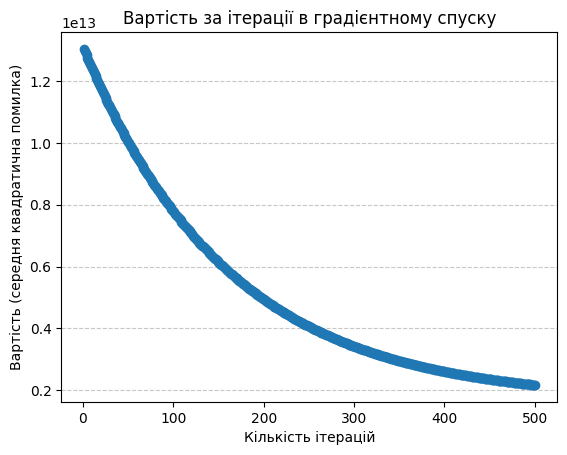

In [122]:
num_iterations = len(cost_history)

plt.plot(range(1, num_iterations + 1), cost_history, marker='o')
plt.xlabel('Кількість ітерацій')
plt.ylabel('Вартість (середня квадратична помилка)')
plt.title('Вартість за ітерації в градієнтному спуску')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

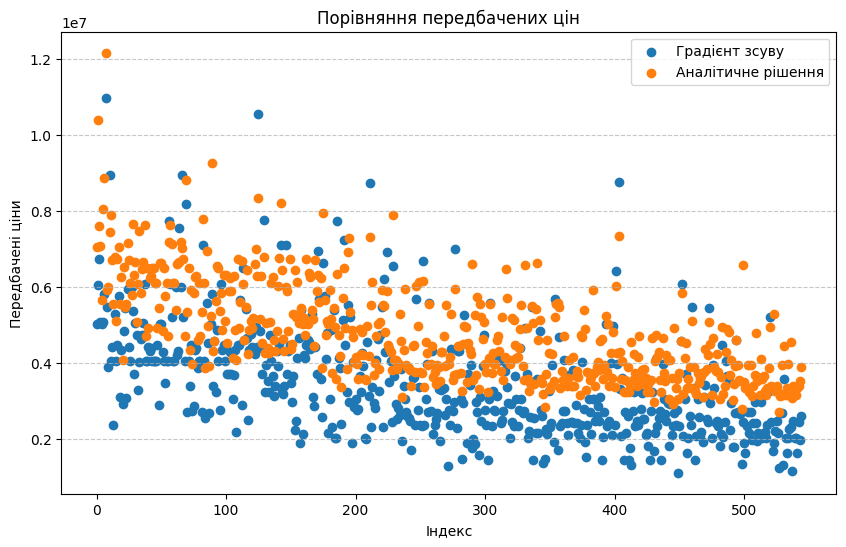

In [123]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(predicted_prices_gradient_descent)), predicted_prices_gradient_descent, label='Градієнт зсуву')
plt.scatter(range(len(predicted_prices_analytical)), predicted_prices_analytical, label='Аналітичне рішення')
plt.xlabel('Індекс')
plt.ylabel('Передбачені ціни')
plt.legend()
plt.title('Порівняння передбачених цін')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

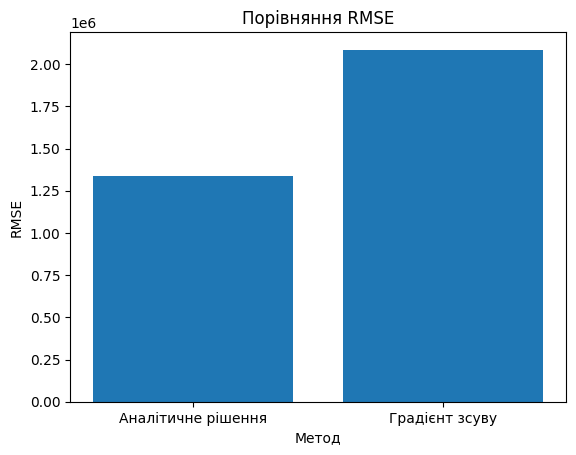

In [124]:
plt.bar(['Аналітичне рішення', 'Градієнт зсуву'], [rmse_analytical, rmse_gradient_descent])
plt.xlabel('Метод')
plt.ylabel('RMSE')
plt.title('Порівняння RMSE')
plt.show()

In [125]:
X = df['area'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

regressor = LinearRegression()
regressor.fit(X, y)
y_pred = regressor.predict(X)

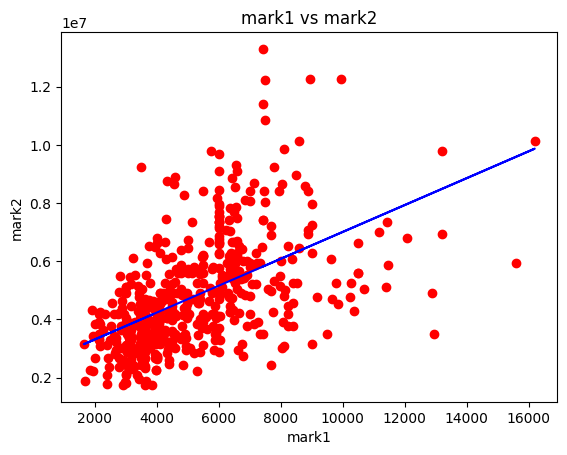

In [126]:
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('mark1 vs mark2')
plt.xlabel('mark1')
plt.ylabel('mark2')
plt.show()